In [2]:
%load_ext autoreload
%autoreload 2

# Multilabel

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from multiclass_helper import draw_neural_net

In [4]:
def generate_dataset(N = 200):
    N = N//4
    v = 0.08 
    X1 = np.random.multivariate_normal([-0.5, 0.5], [[v, 0], [0, v]], size = N)
    X2 = np.random.multivariate_normal([0.5, -0.5], [[v, 0], [0, v]], size = N)
    X3 = np.random.multivariate_normal([0.5, 0.5], [[v, 0], [0, v]], size = N)
    X4 = np.random.multivariate_normal([-0.5, -0.5], [[v, 0], [0, v]], size = N)
    X = np.vstack([X1, X2, X3, X4])
    y = np.vstack([
        np.array(N*[[1, 0, 1, 0]]), 
        np.array(N*[[0, 1, 0, 1]]), 
        np.array(N*[[0, 1, 1, 0]]), 
        np.array(N*[[1, 0, 0, 1]])])
    return X, y

In [5]:
X, y = generate_dataset(N = 2000)

In [6]:
X.shape, y.shape

((2000, 2), (2000, 4))

In [7]:
print(X[:10])
print(y[:10])

[[-0.40141064  0.46525631]
 [-0.47641333  0.36004187]
 [-0.32491379  0.18223547]
 [-0.88556643 -0.02155622]
 [-0.40877025  0.41043282]
 [-0.62551609  0.00827091]
 [-0.23891993  0.59332686]
 [-0.09279778  0.45824392]
 [-0.54133242  0.65680094]
 [-0.02209977  0.89764478]]
[[1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]]


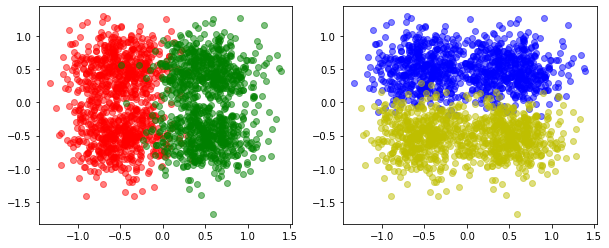

In [8]:
# [r, g, b, y]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4)) 
ax1.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c='r', alpha=0.5)
ax1.scatter(X[y[:,1]==1, 0], X[y[:,1]==1, 1], c='g', alpha=0.5)
ax2.scatter(X[y[:,2]==1, 0], X[y[:,2]==1, 1], c='b', alpha=0.5)
ax2.scatter(X[y[:,3]==1, 0], X[y[:,3]==1, 1], c='y', alpha=0.5)
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

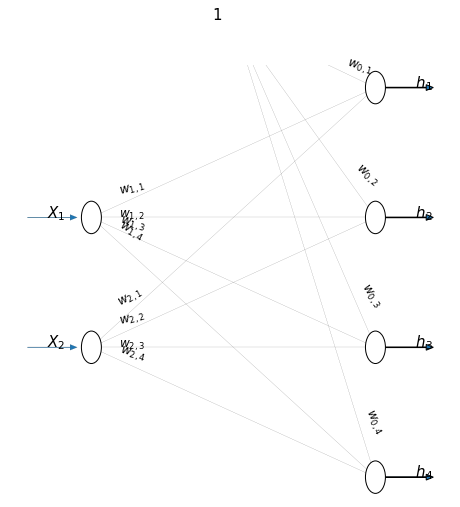

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
biases = [[ '$w_{0,1}$', '$w_{0,2}$', '$w_{0,3}$', '$w_{0,4}$']]
capa_1 = [['$w_{1,1}$', '$w_{1,2}$', '$w_{1,3}$', '$w_{1,4}$'],
          ['$w_{2,1}$', '$w_{2,2}$', '$w_{2,3}$', '$w_{2,4}$'], 
          ['$w_{3,1}$', '$w_{3,2}$', '$w_{3,3}$', '$w_{3,4}$']]
weights = [np.array(capa_1)]
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, [2,4], weights, biases)
plt.show()

In [12]:
hidden_units = 20
input_features=2
output_size = y.shape[1]
model = Sequential()
model.add(Dense(output_size, name="Salida", activation='sigmoid', input_shape=(2, )))
model.summary()


lr = 0.05 
# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [13]:
batch_size = 20
epochs = 10

model.fit(X, y, epochs=epochs)

Train on 2000 samples
Epoch 1/10
2000/2000 [==============================] - 0s 233us/sample - loss: 0.4974 - accuracy: 0.8462
Epoch 2/10
2000/2000 [==============================] - 0s 31us/sample - loss: 0.2462 - accuracy: 0.9671
Epoch 3/10
2000/2000 [==============================] - 0s 33us/sample - loss: 0.1781 - accuracy: 0.9666
Epoch 4/10
2000/2000 [==============================] - 0s 30us/sample - loss: 0.1478 - accuracy: 0.9686
Epoch 5/10
2000/2000 [==============================] - 0s 29us/sample - loss: 0.1305 - accuracy: 0.9672
Epoch 6/10
2000/2000 [==============================] - 0s 31us/sample - loss: 0.1195 - accuracy: 0.9672
Epoch 7/10
2000/2000 [==============================] - 0s 32us/sample - loss: 0.1122 - accuracy: 0.9666
Epoch 8/10
2000/2000 [==============================] - 0s 29us/sample - loss: 0.1067 - accuracy: 0.9675
Epoch 9/10
2000/2000 [==============================] - 0s 37us/sample - loss: 0.1023 - accuracy: 0.9666
Epoch 10/10
2000/2000 [=========

In [258]:
# [r, g, b, y]
model.predict(np.array([[0.5, 0.5]]))

array([[0.00860339, 0.99038637, 0.982608  , 0.01459989]], dtype=float32)

In [260]:
model.evaluate(np.array([[0.5, 0.5]]), np.array([[0, 1, 1, 0]]))

1/1 [==============================] - 0s 46ms/step


[0.012638317421078682, 1.0]

In [269]:
model.predict_proba(np.array([[0.5, 0.5]]))

array([[0.00860339, 0.99038637, 0.982608  , 0.01459989]], dtype=float32)

In [261]:
coefs_, intercept_ = model.get_weights()

In [262]:
coefs_

array([[-10.021508  ,   9.780544  ,  -0.3323118 ,   0.35372728],
       [  0.13239847,  -0.1332541 ,   8.324003  ,  -8.686057  ]],
      dtype=float32)

In [263]:
intercept_

array([ 0.19760127, -0.18874079,  0.03835499, -0.04586953], dtype=float32)

In [276]:
(-np.log(1-0.00860339) - np.log(0.99038637) - np.log(0.982608) - np.log(1-0.01459989))/4

0.012638321732369315